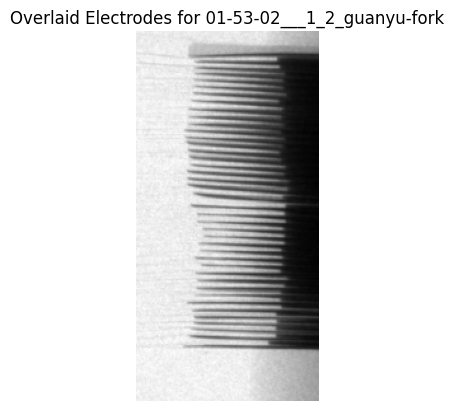

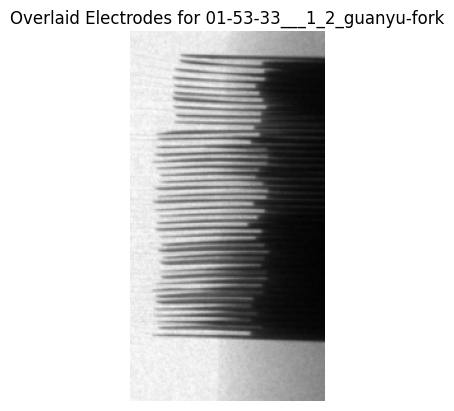

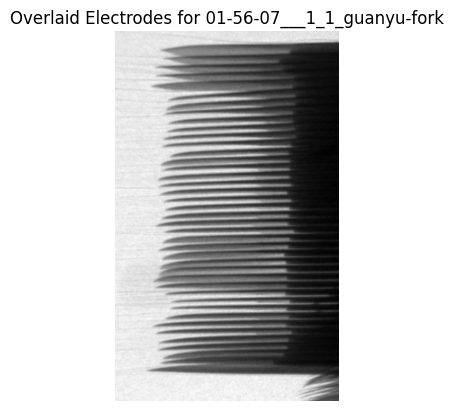

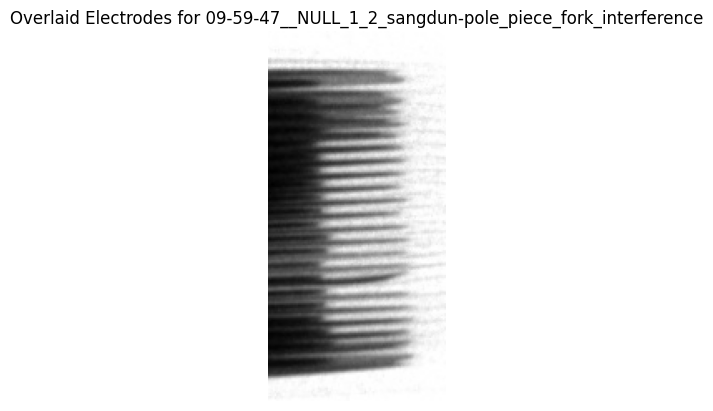

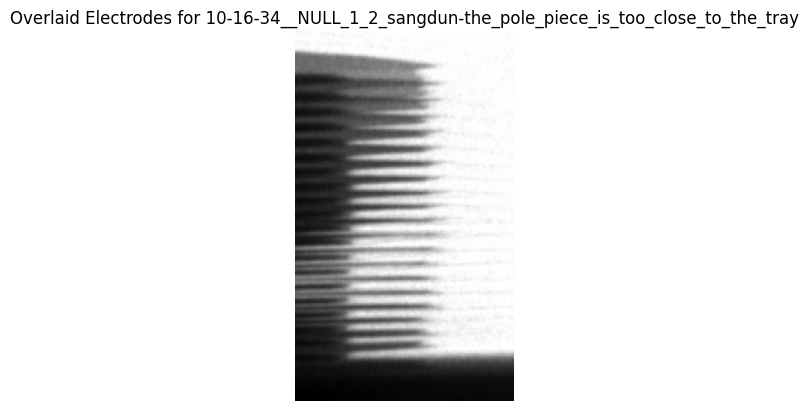

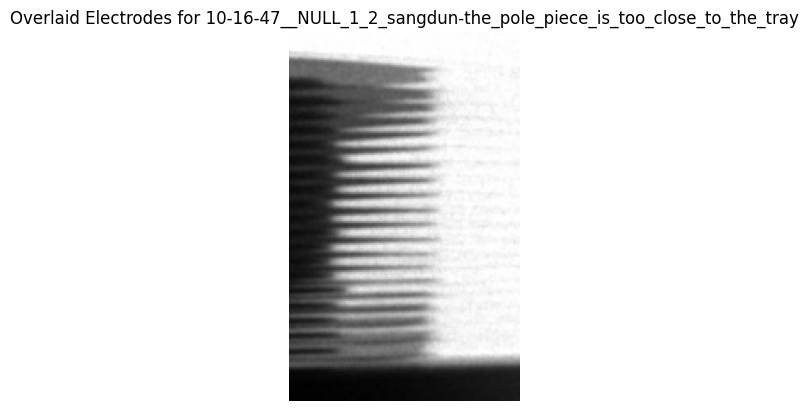

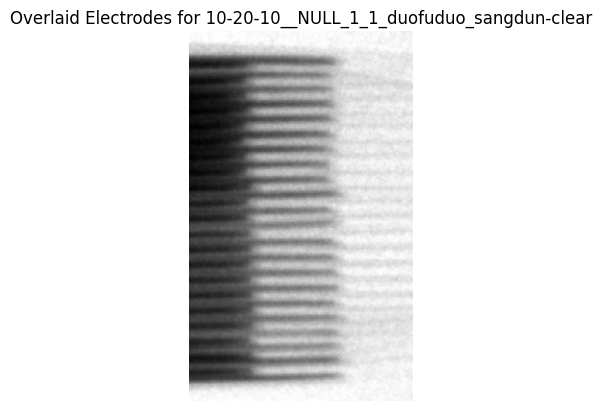

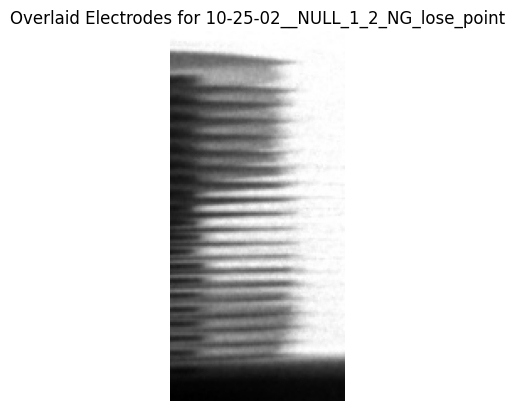

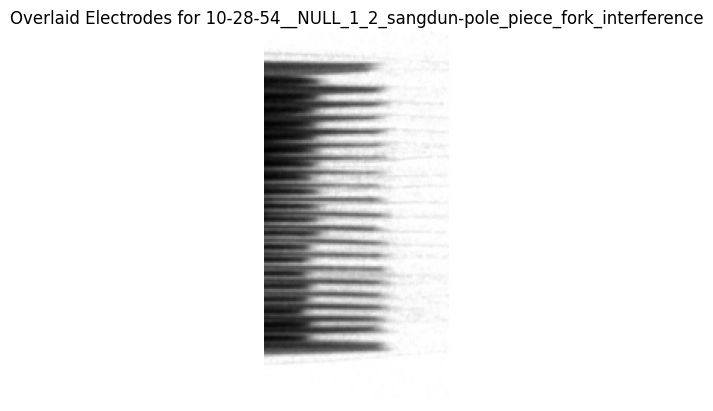

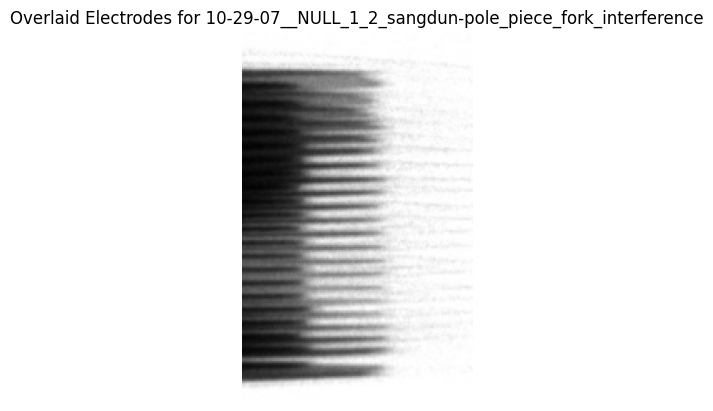

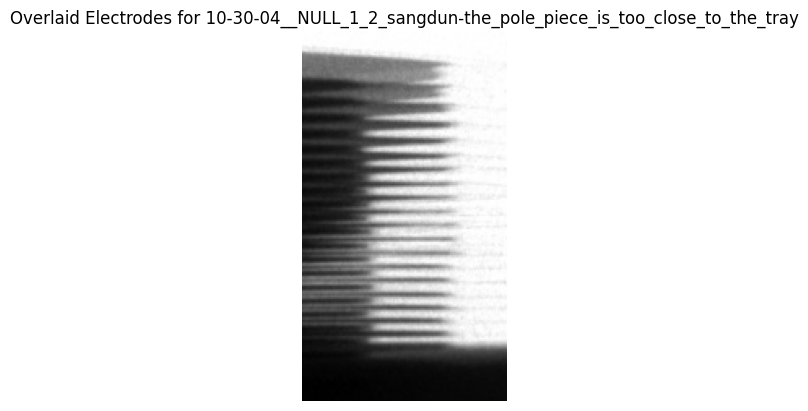

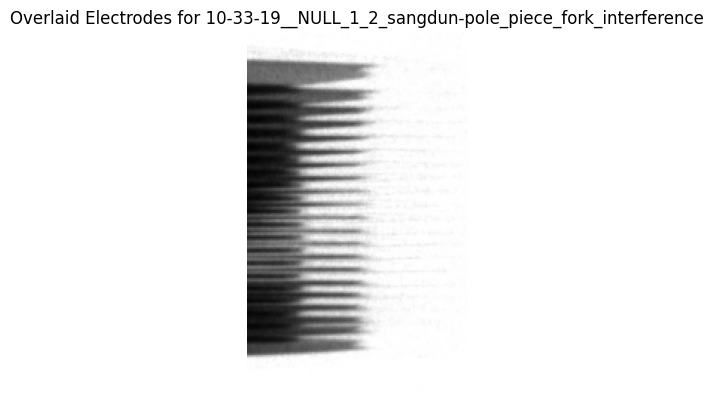

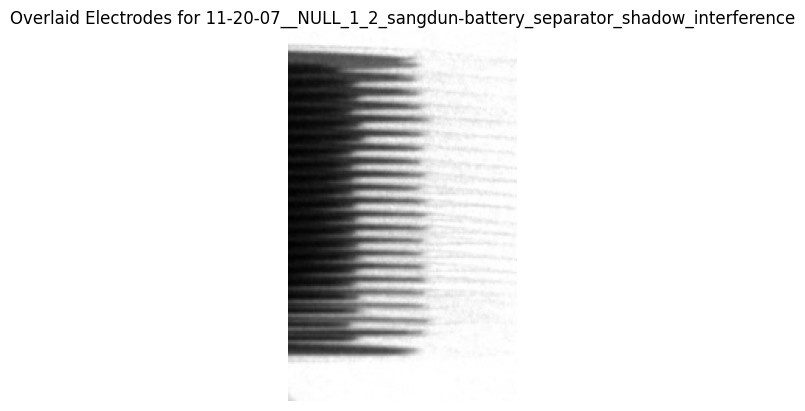

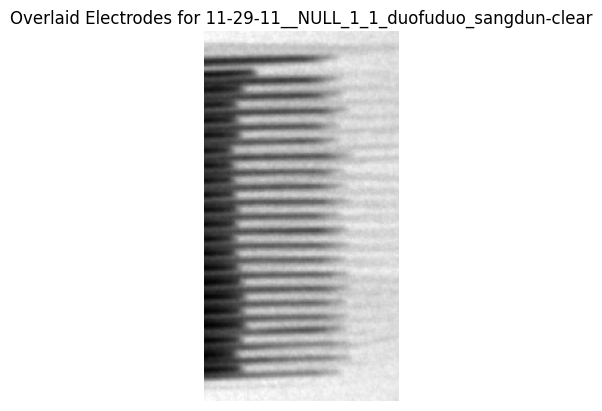

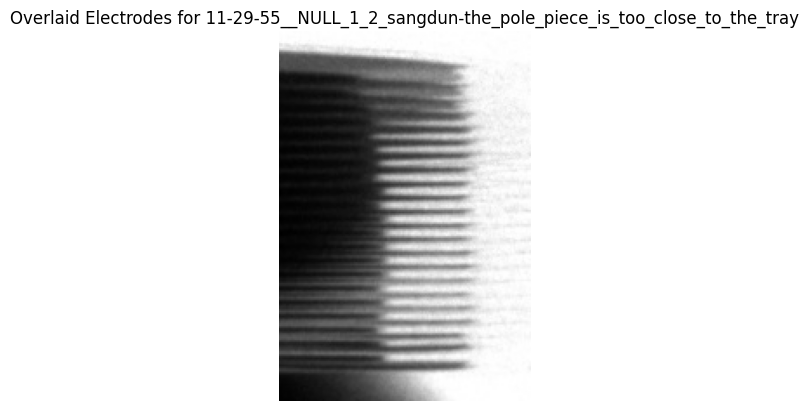

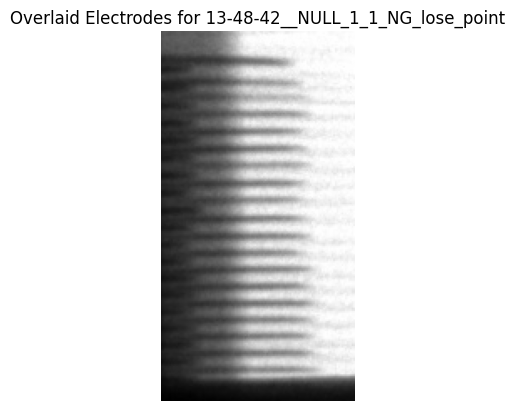

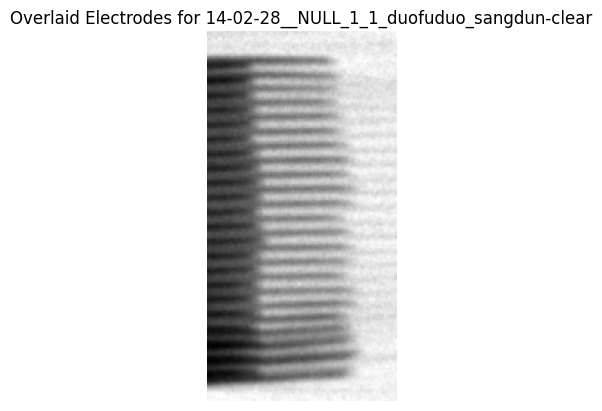

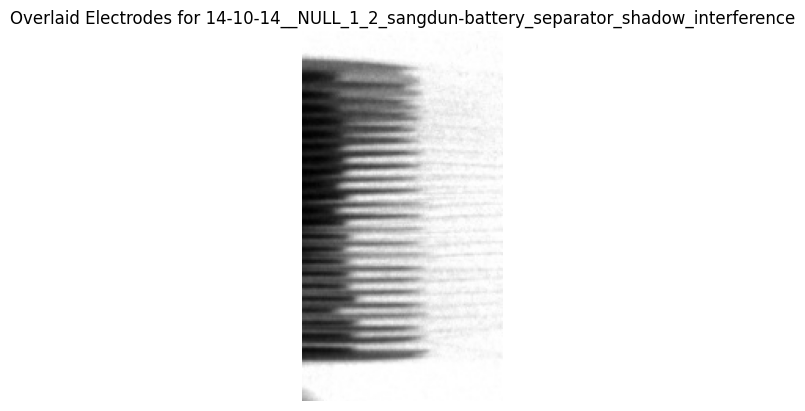

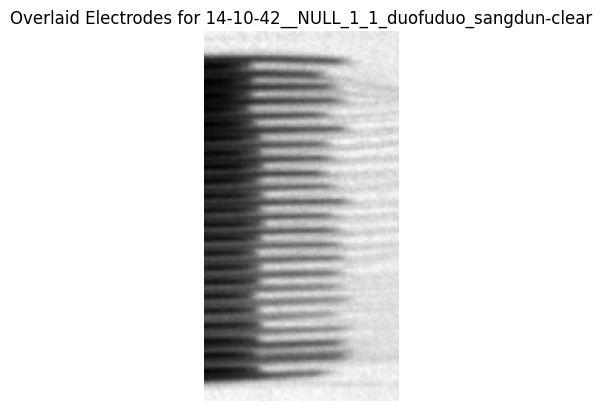

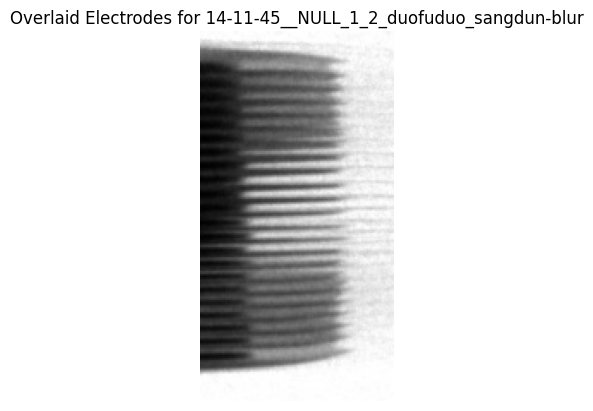

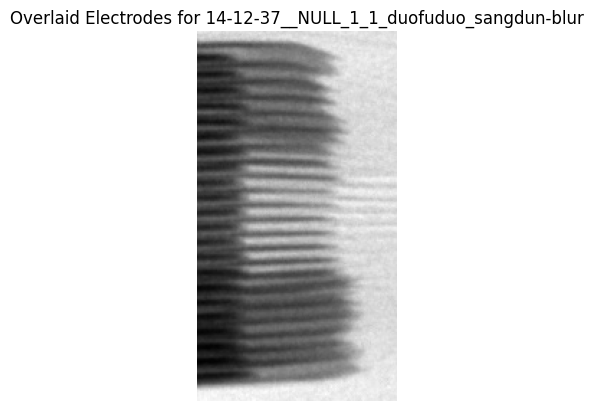

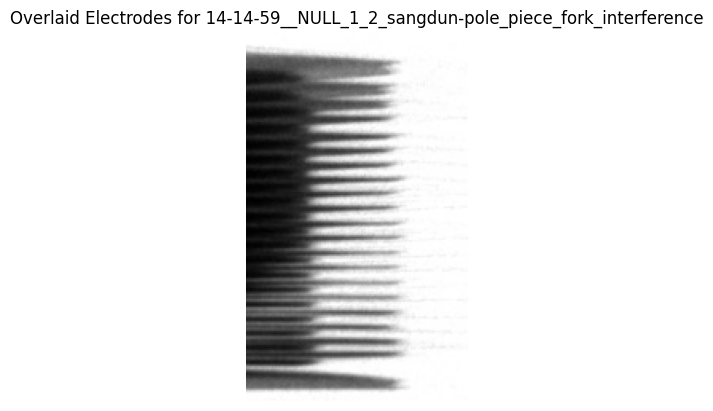

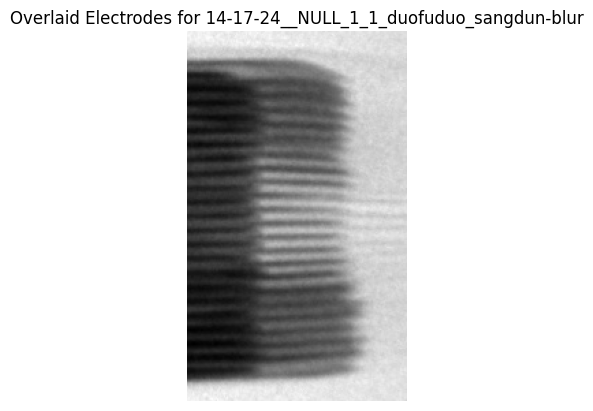

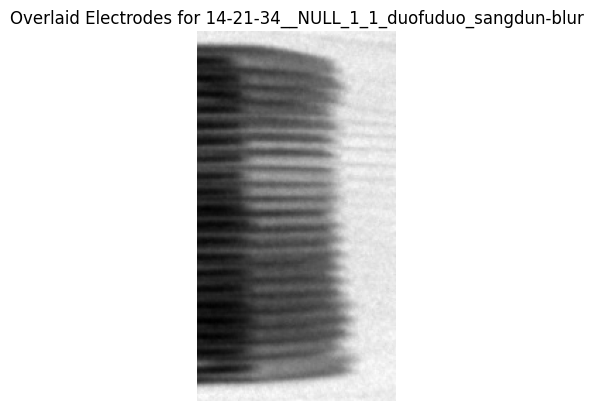

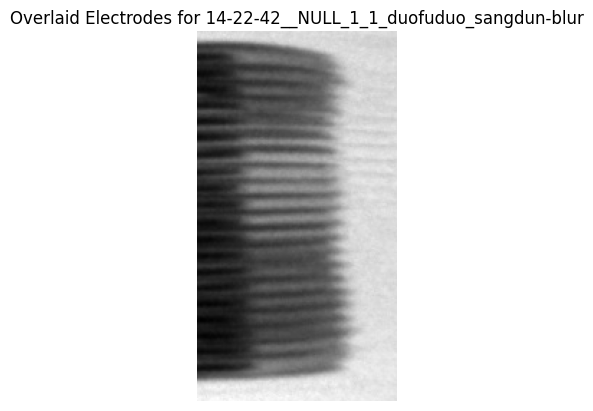

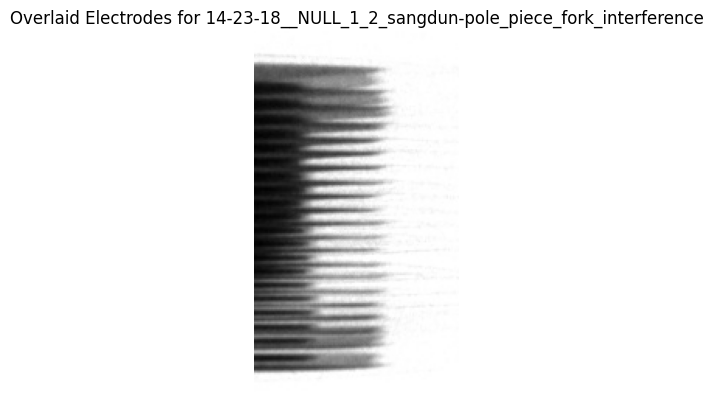

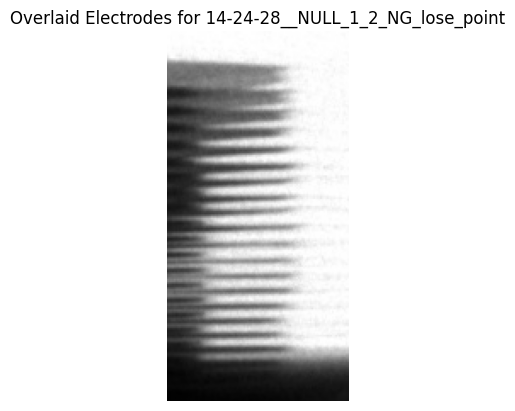

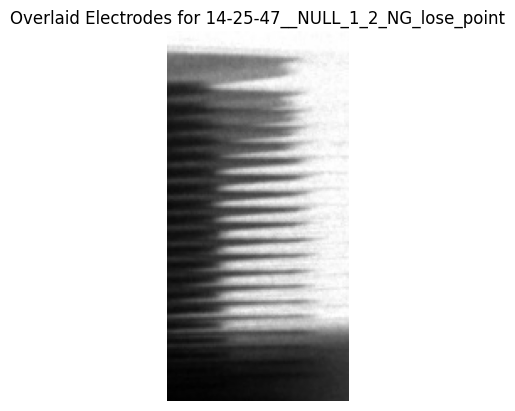

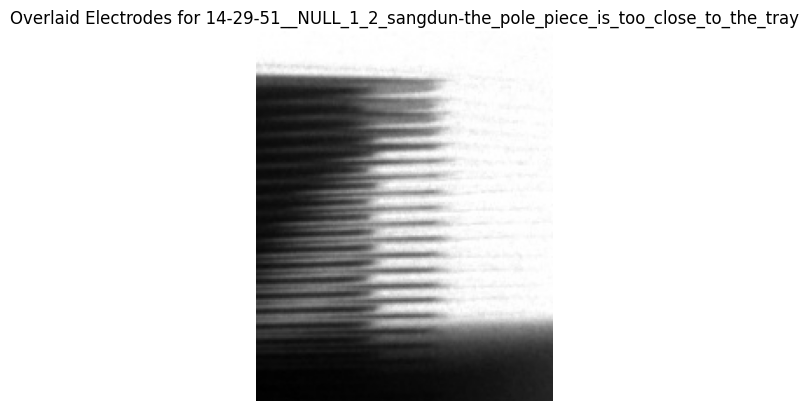

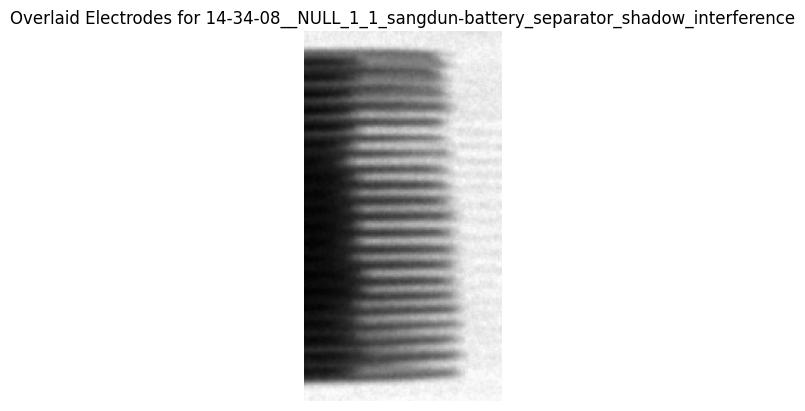

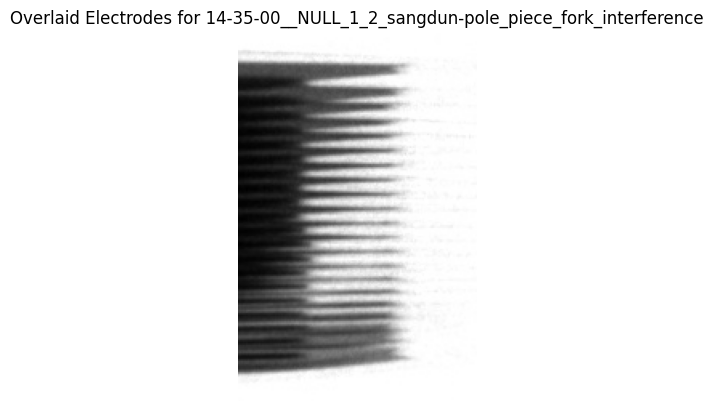

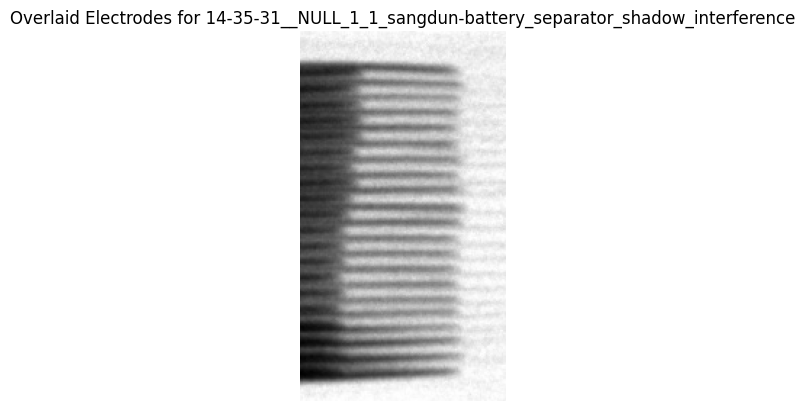

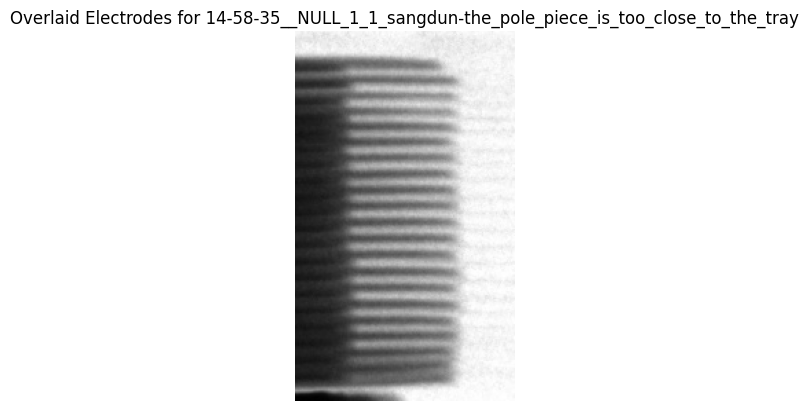

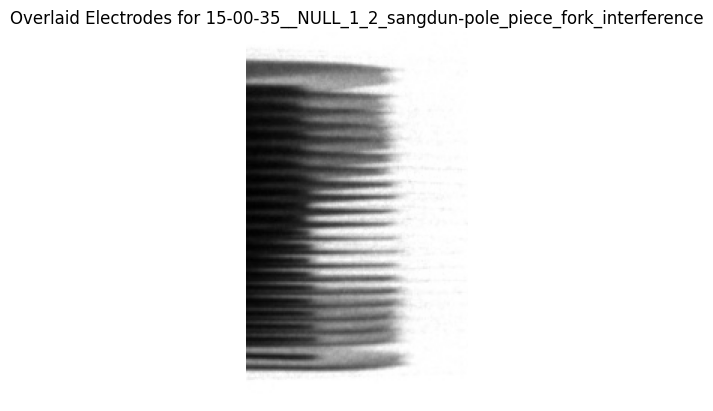

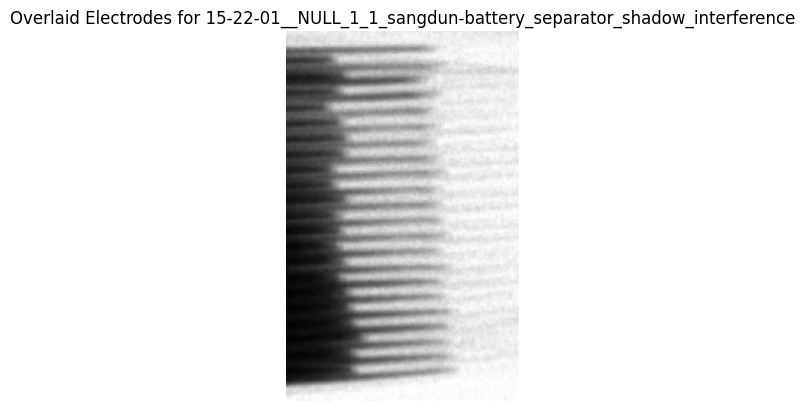

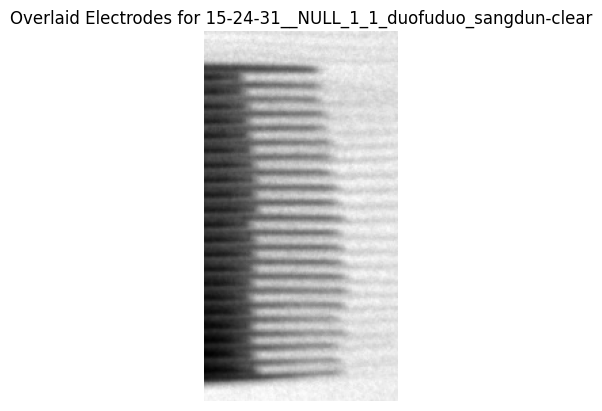

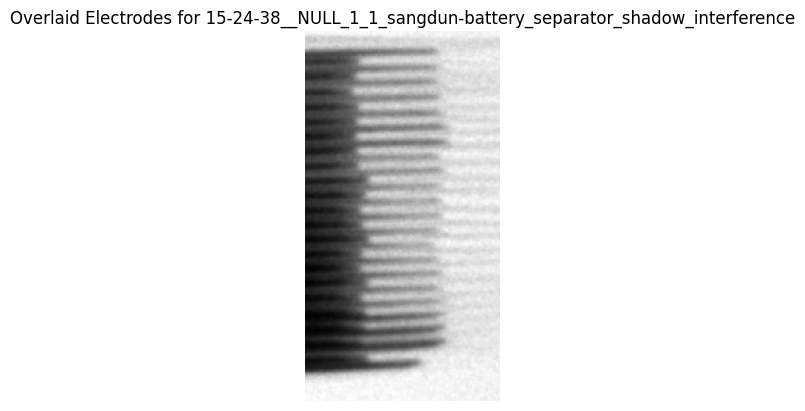

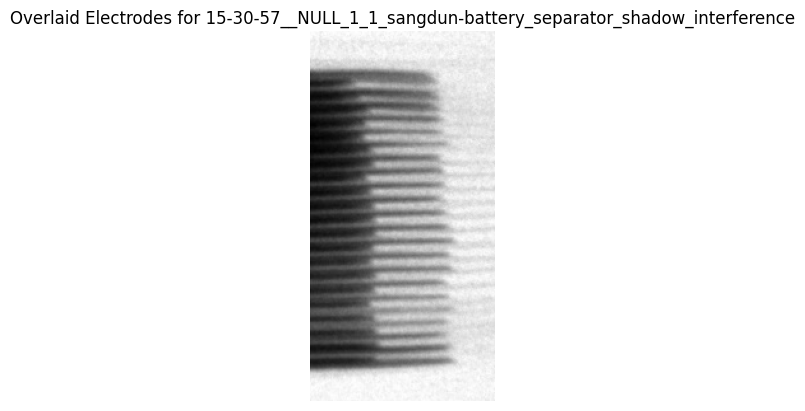

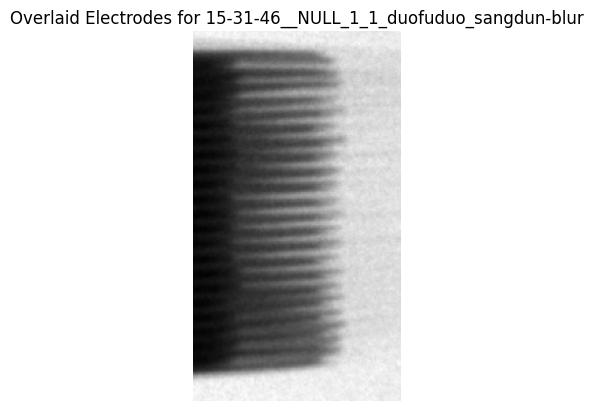

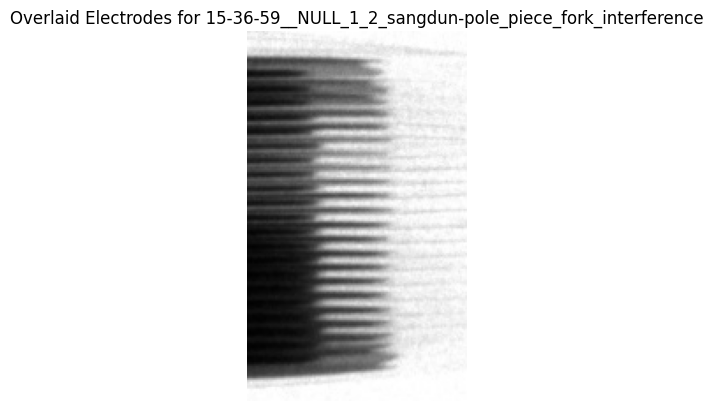

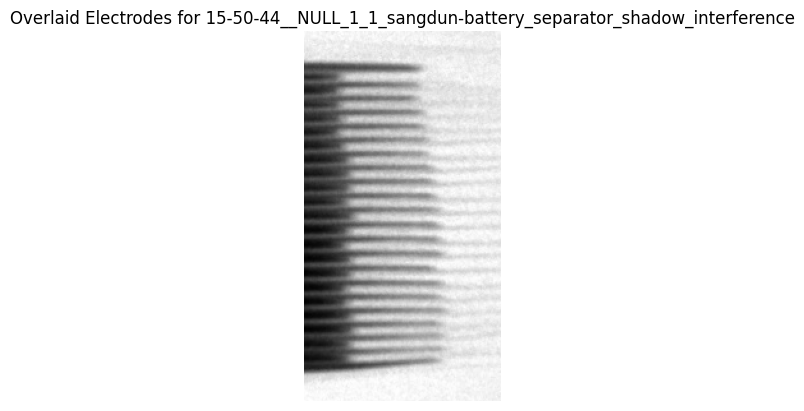

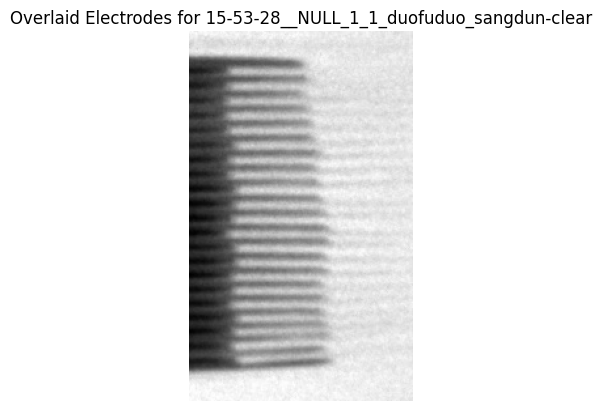

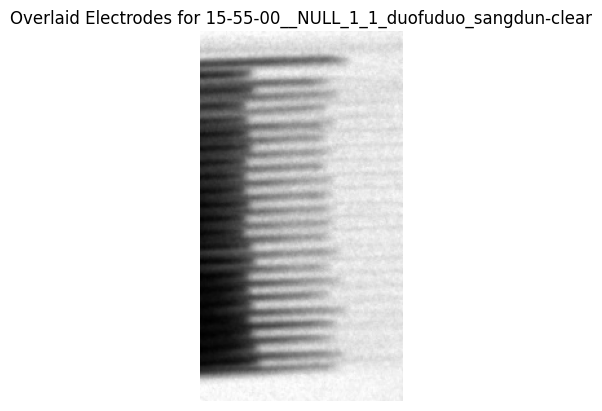

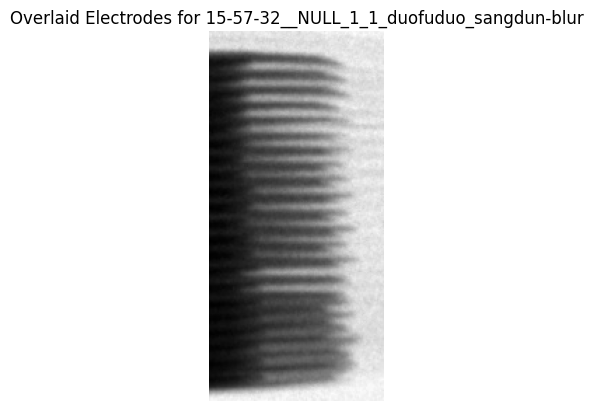

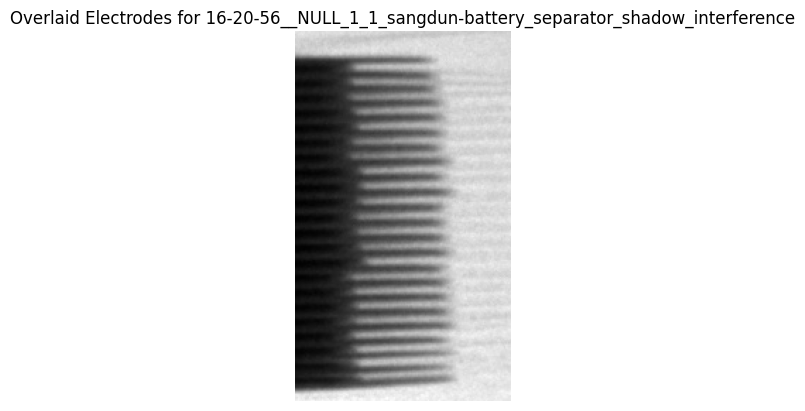

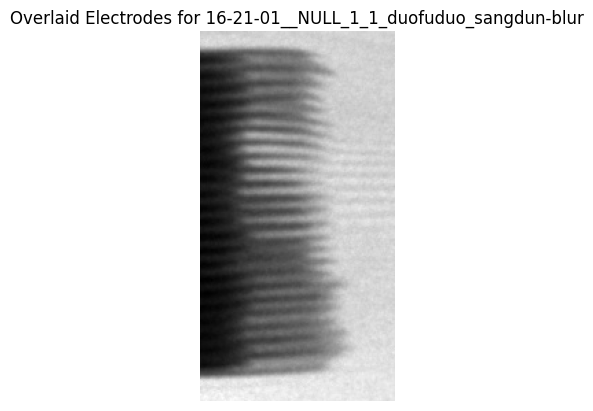

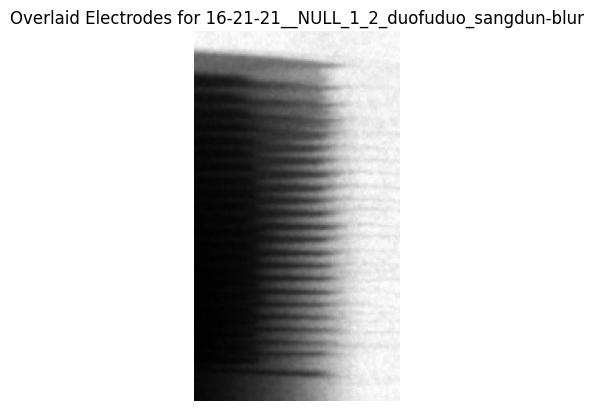

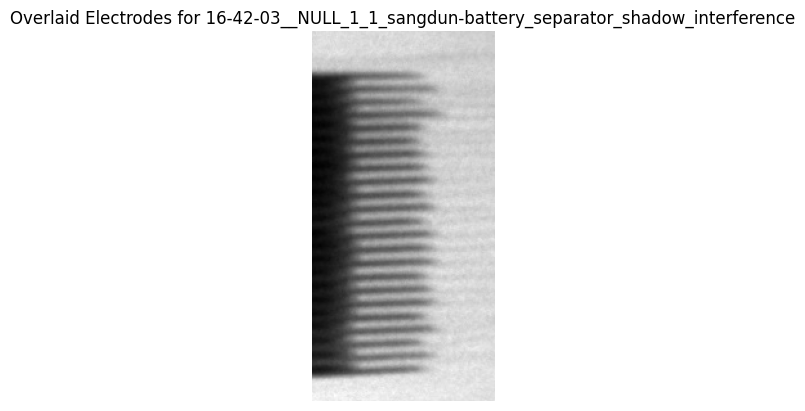

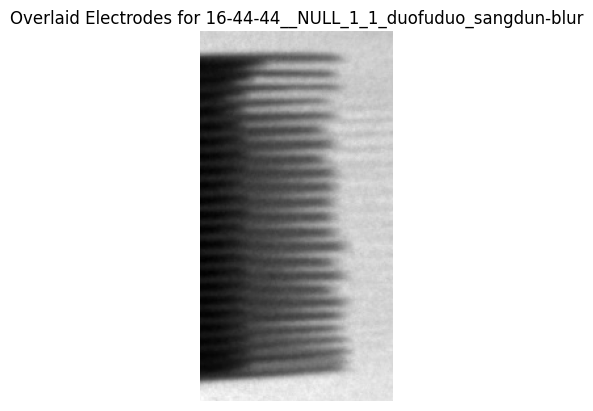

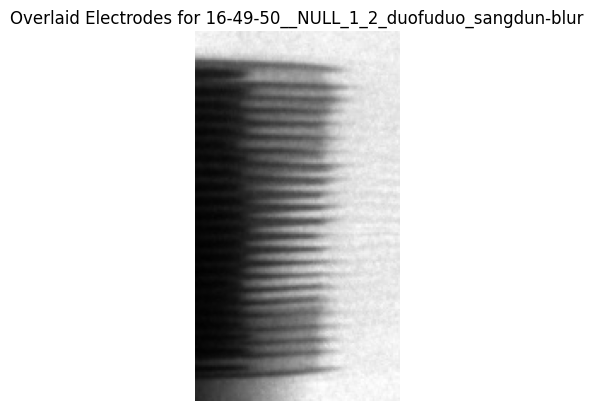

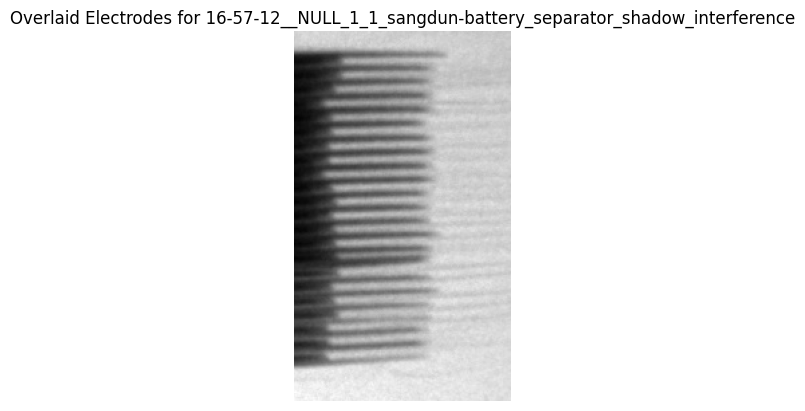

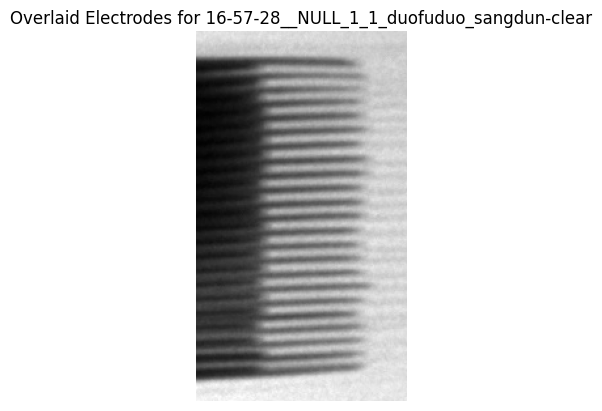

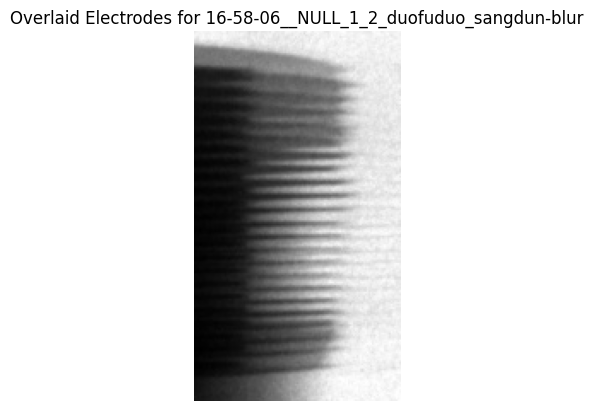

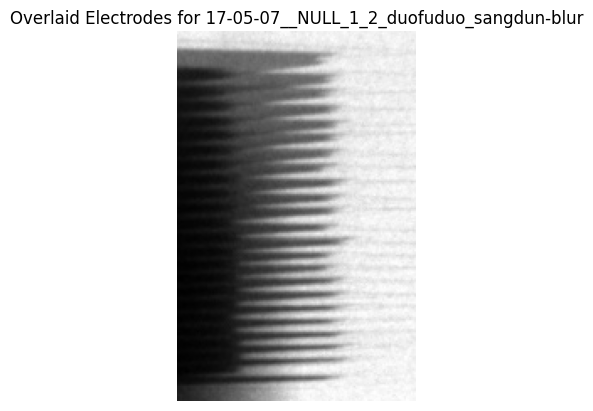

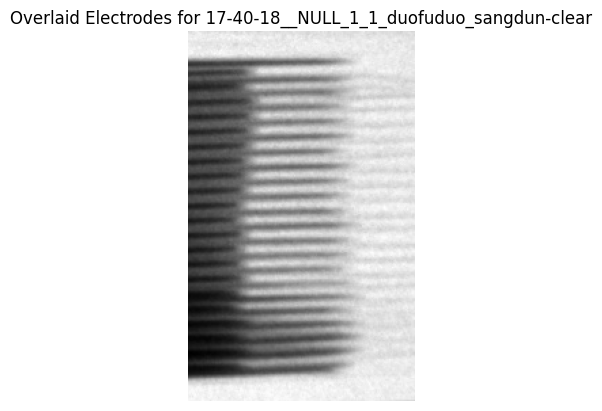

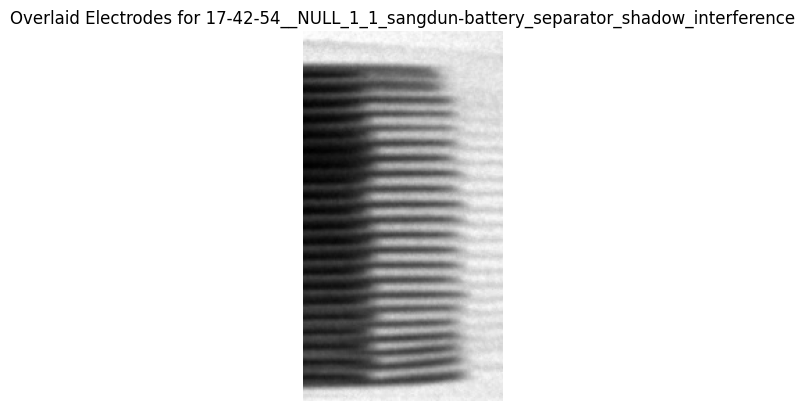

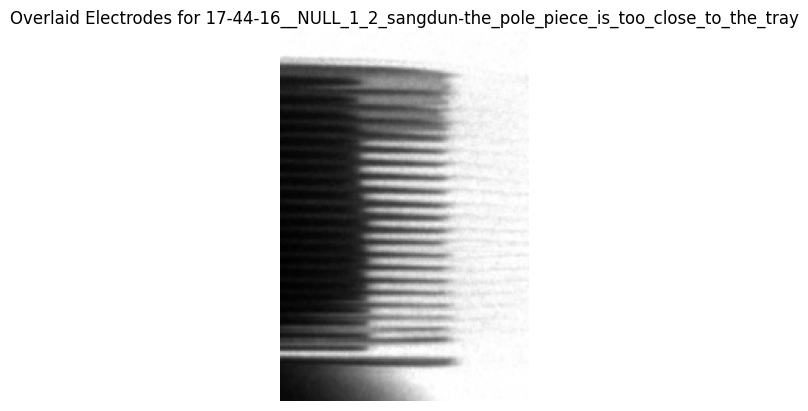

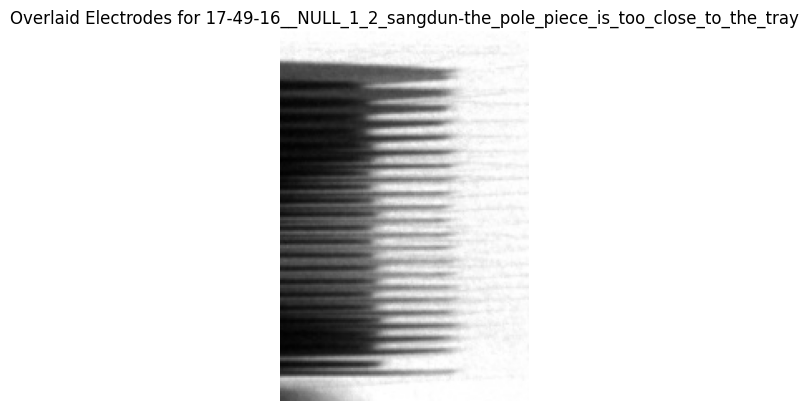

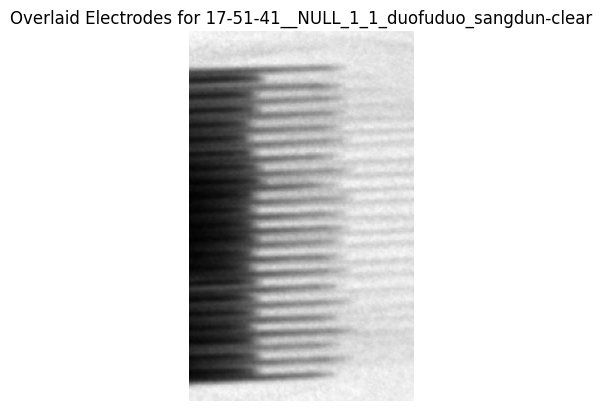

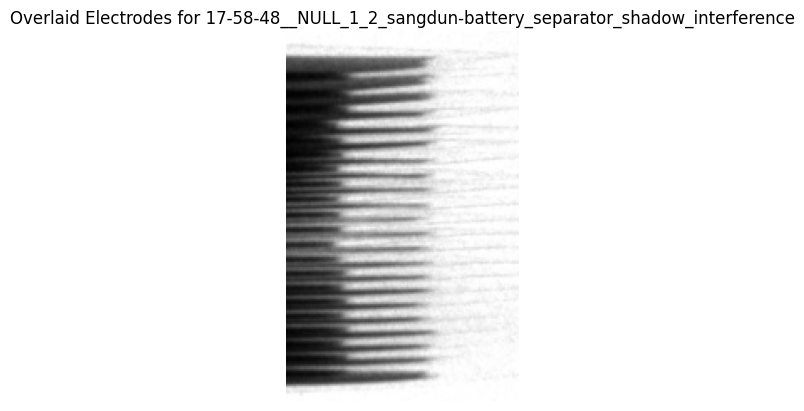

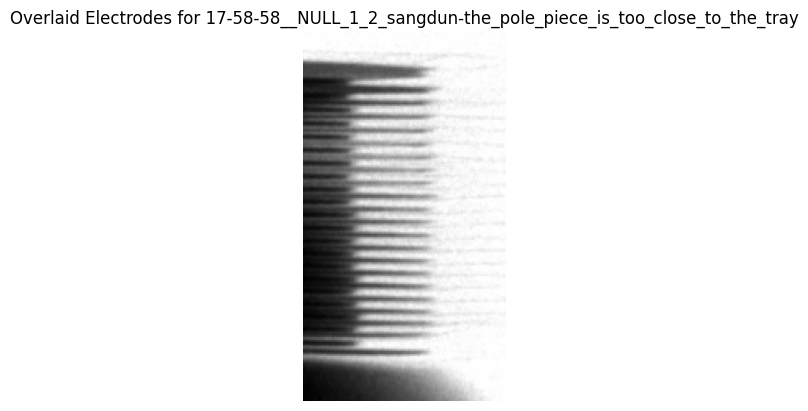

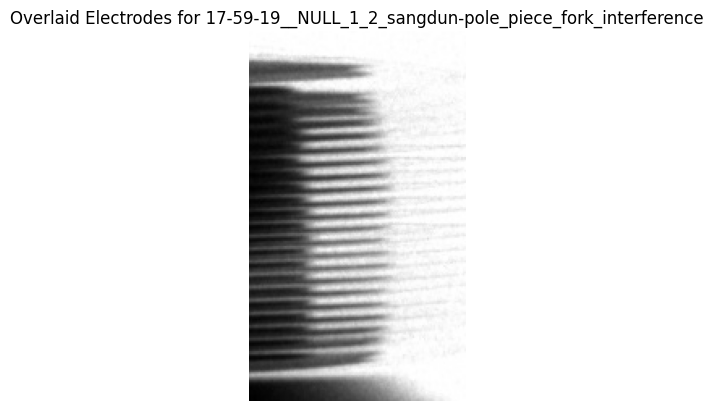

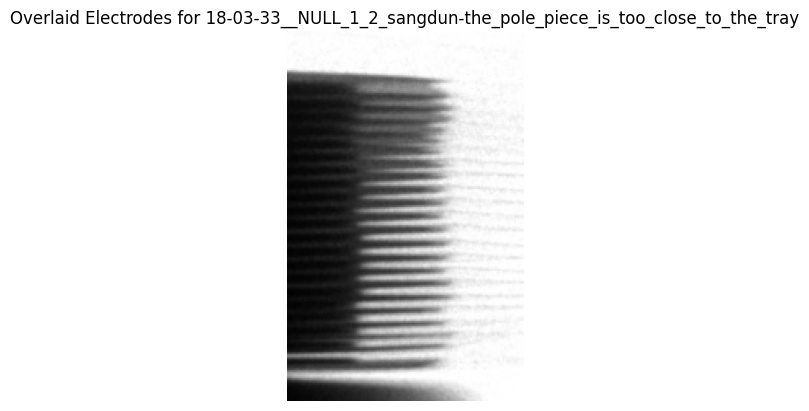

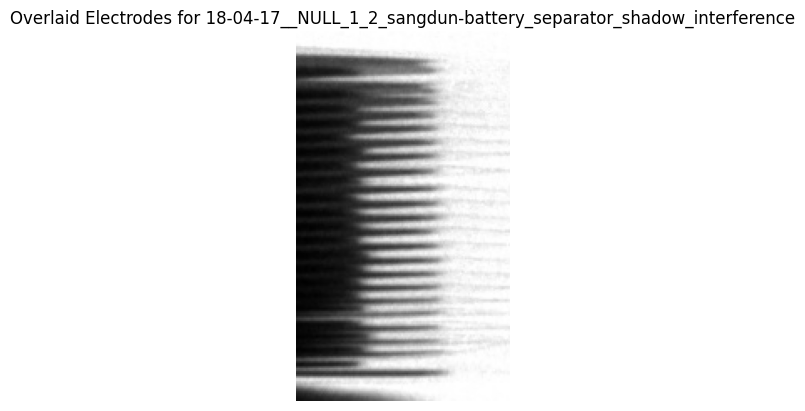

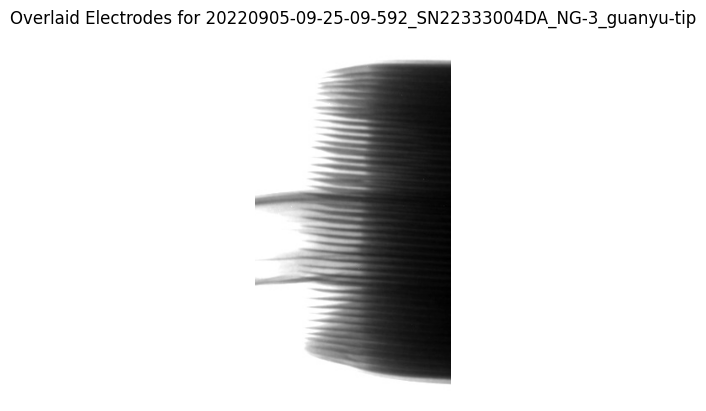

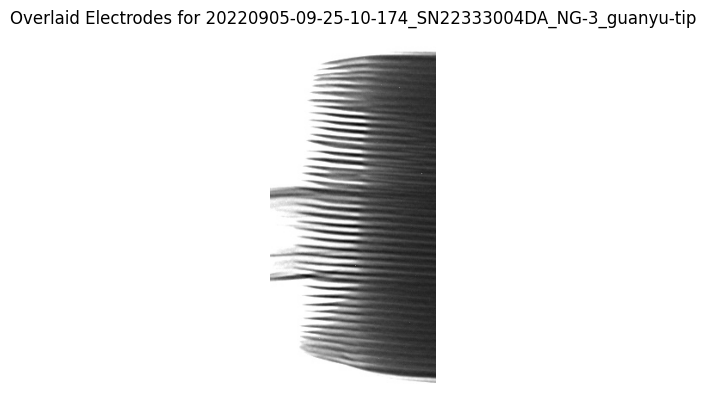

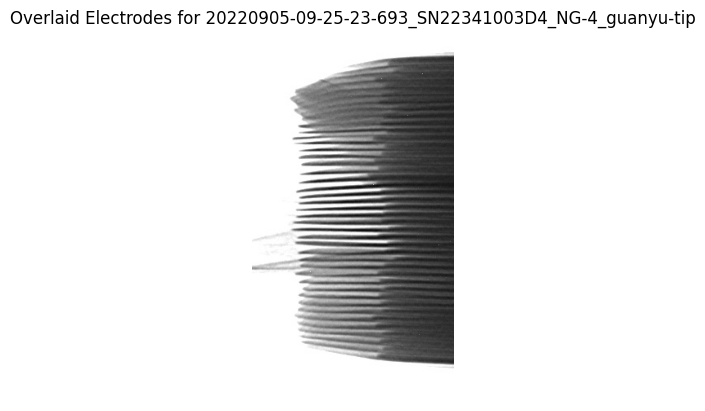

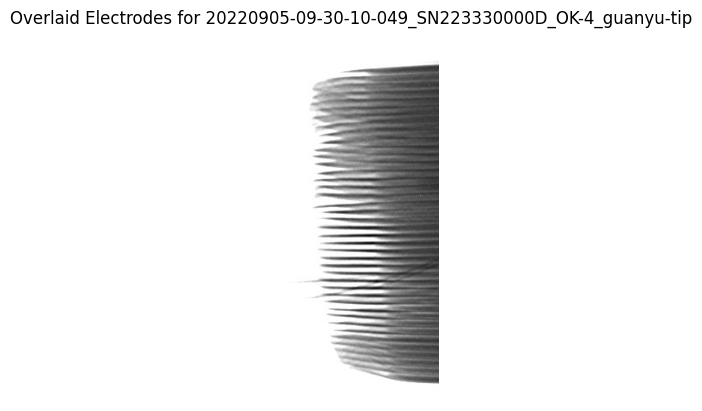

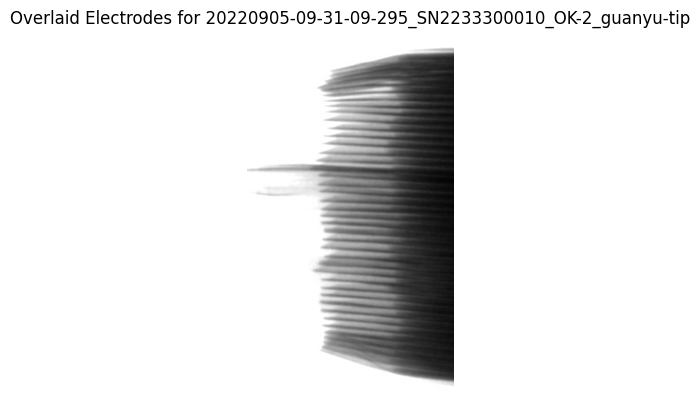

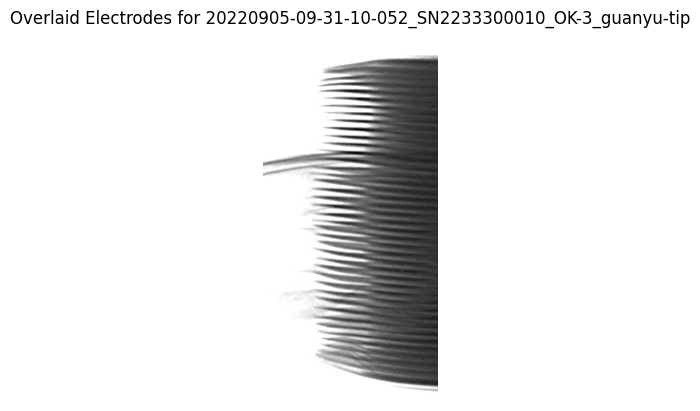

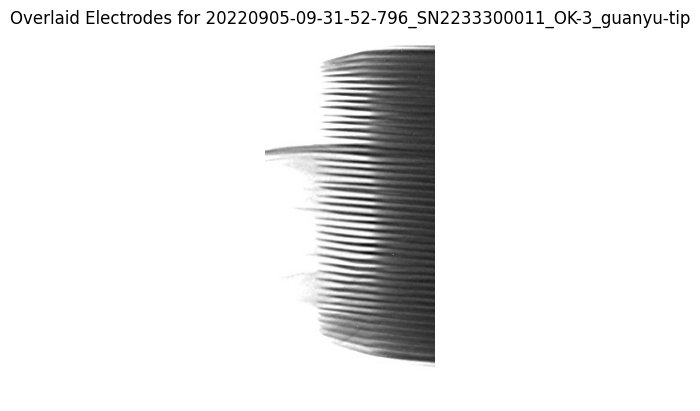

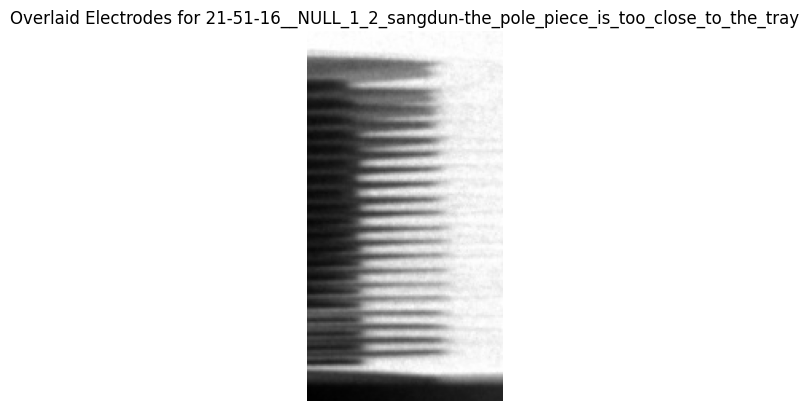

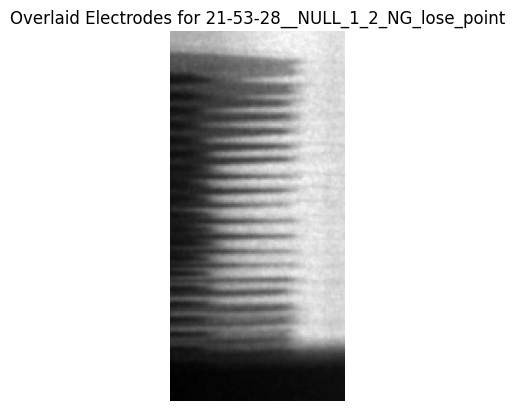

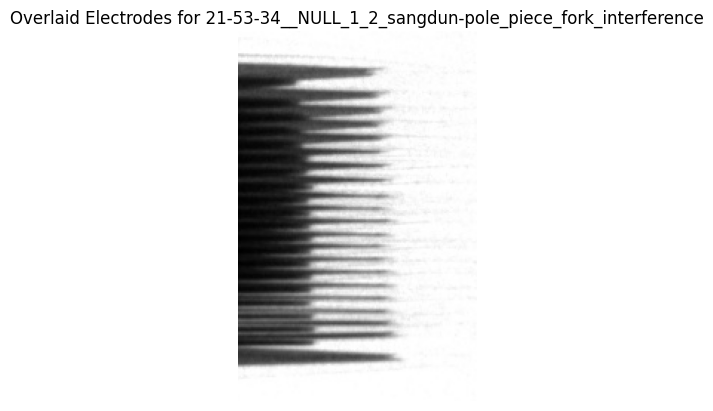

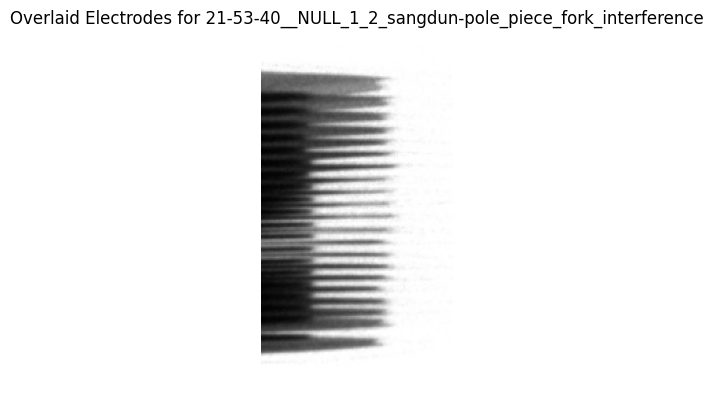

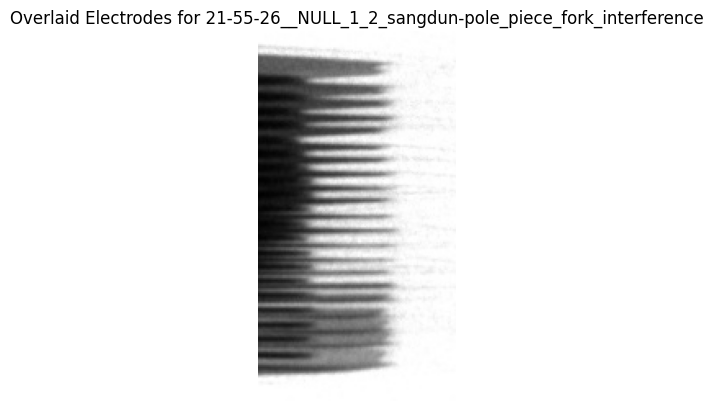

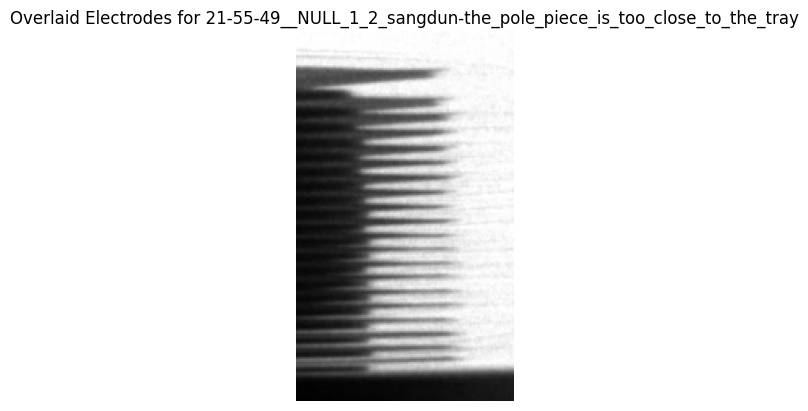

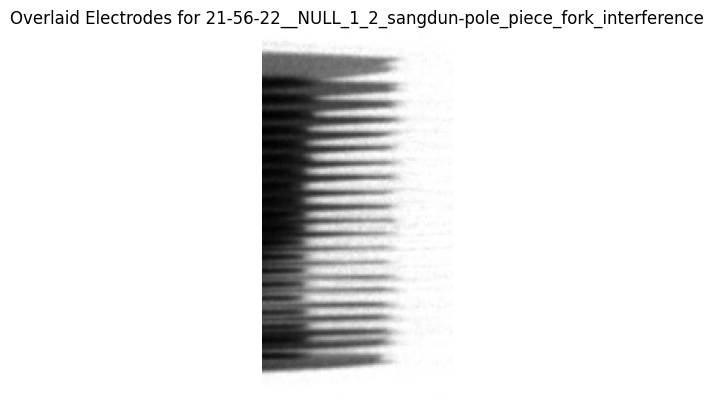

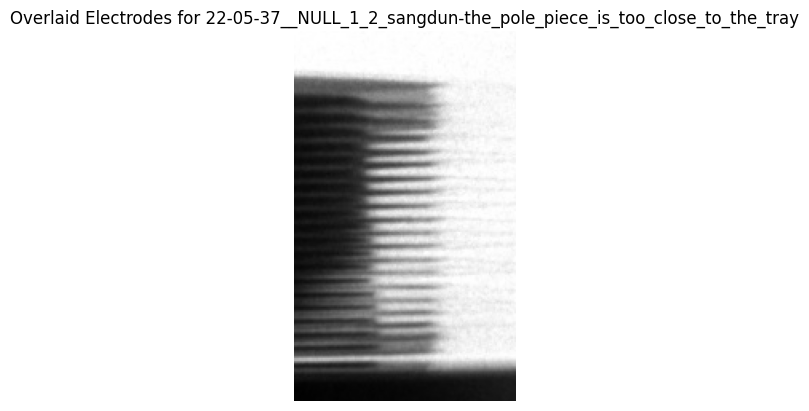

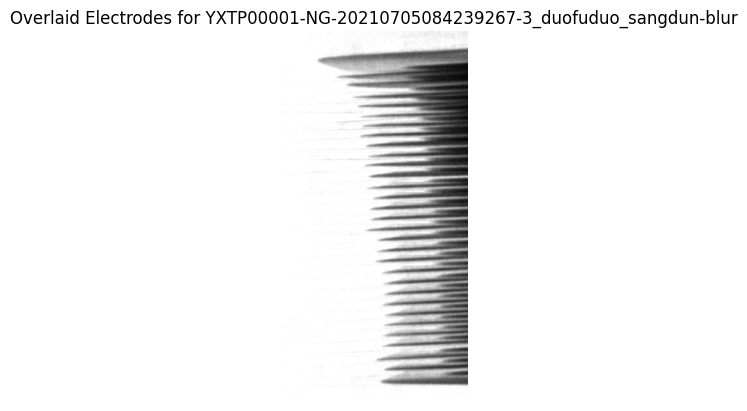

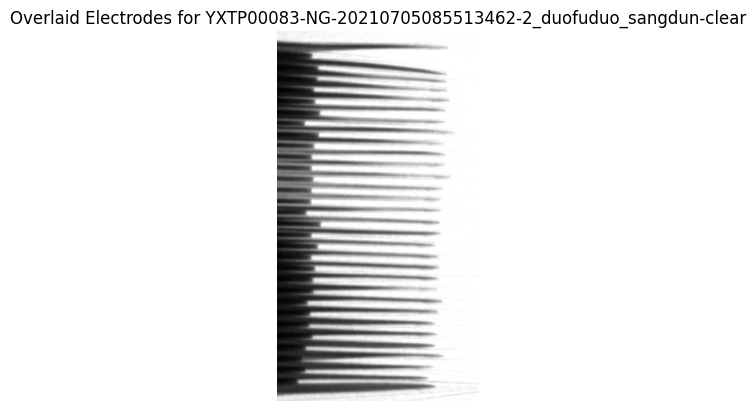

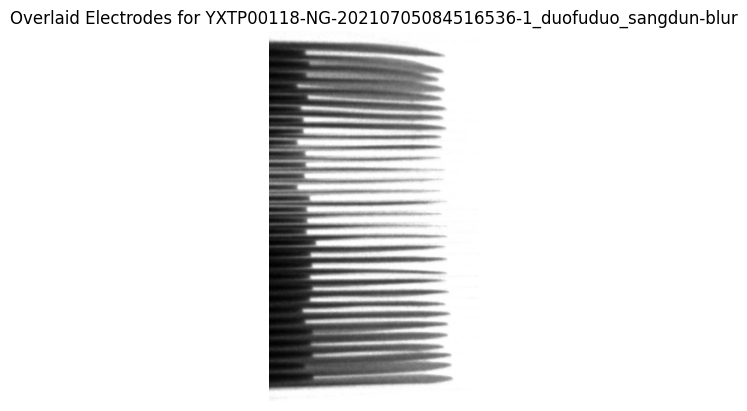

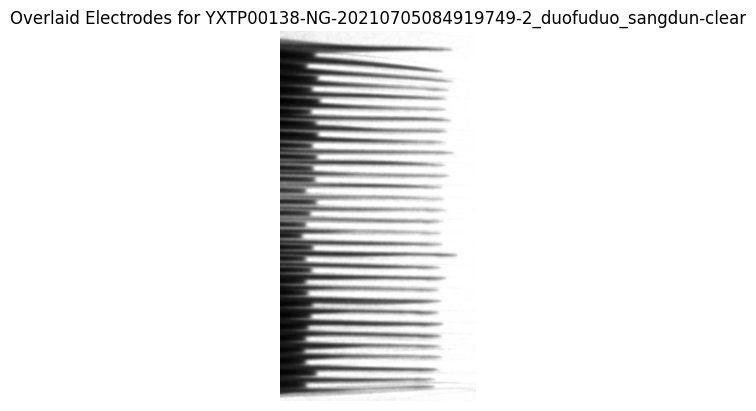

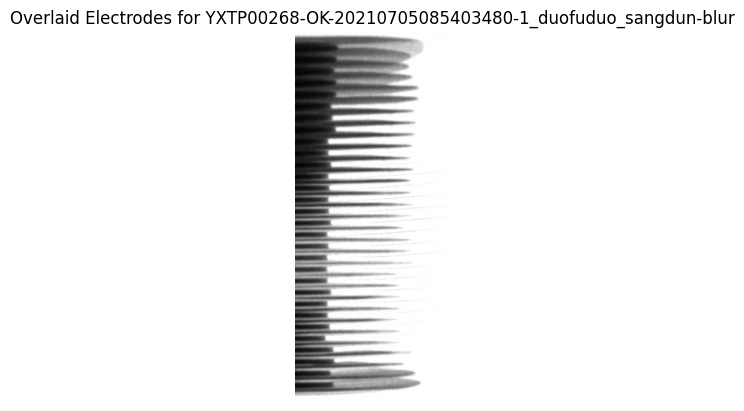

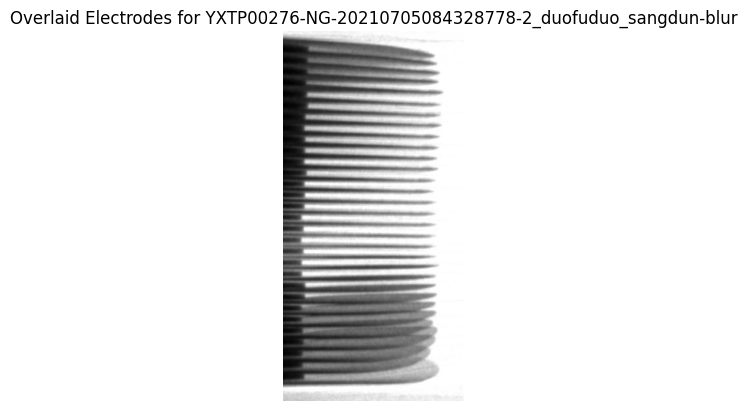

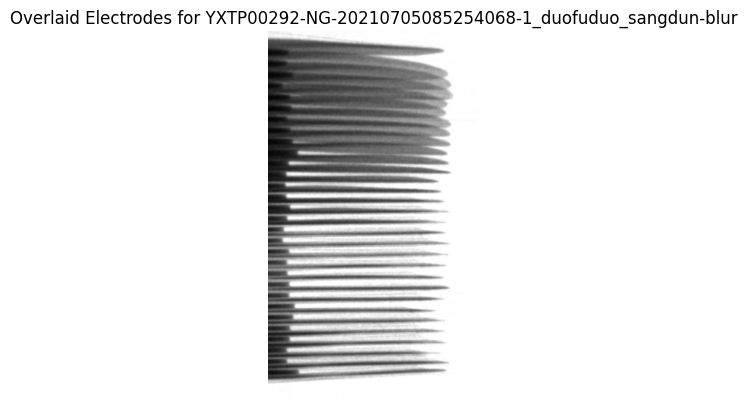

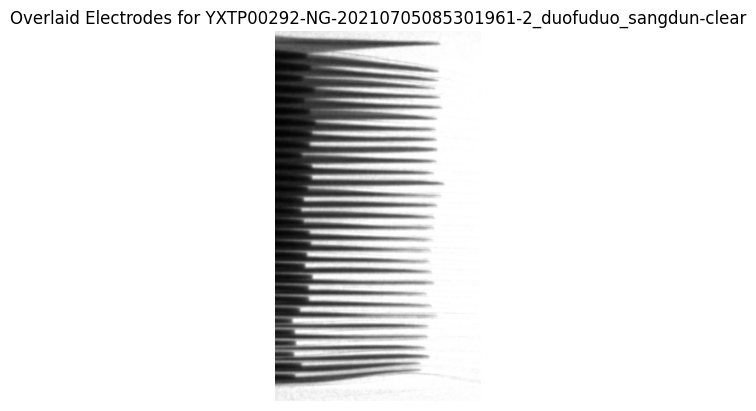

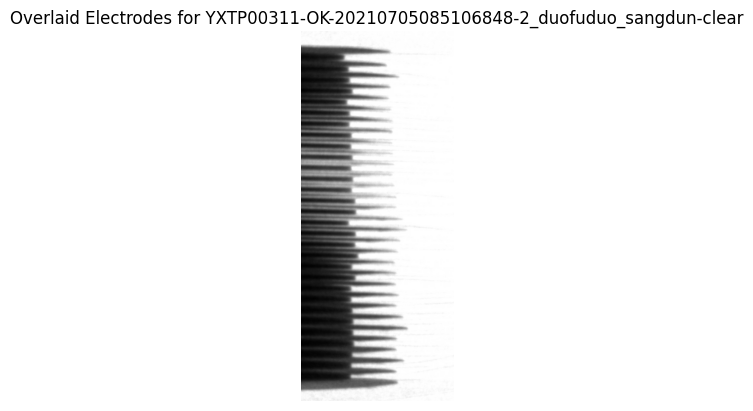

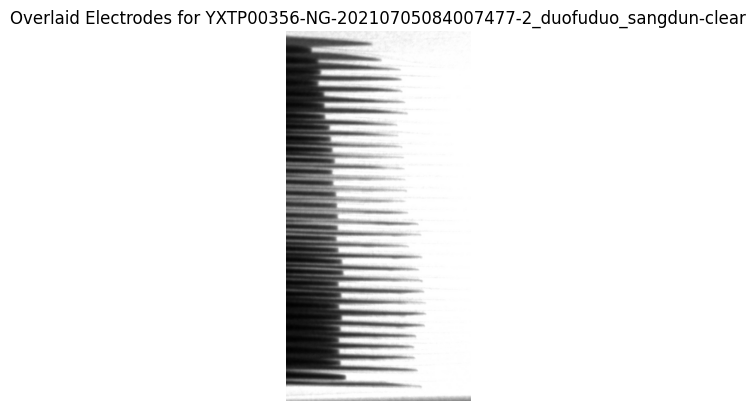

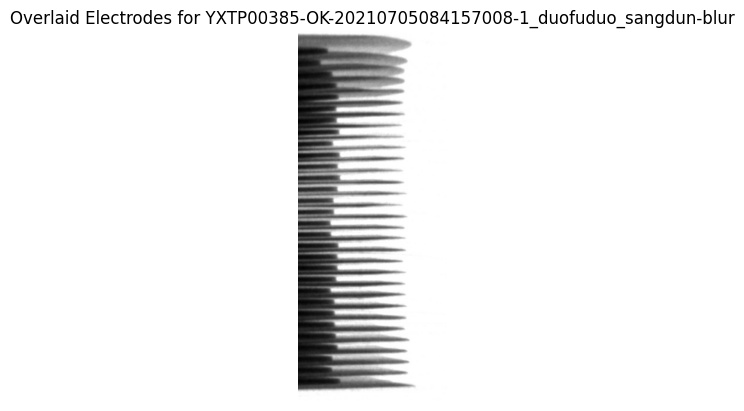

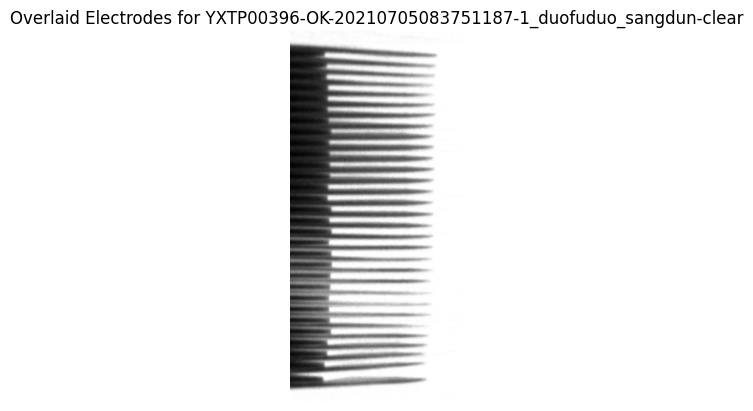

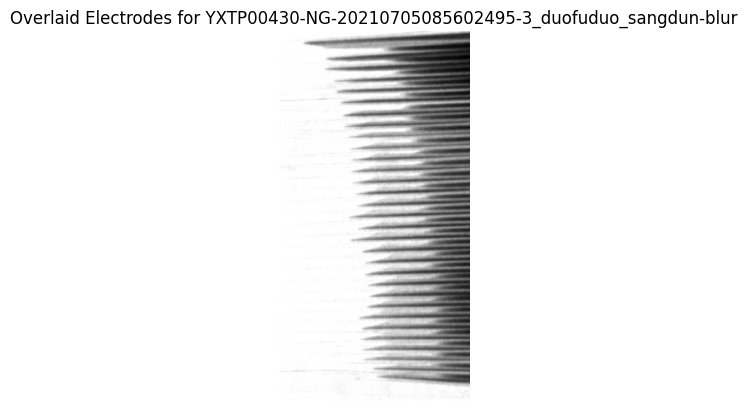

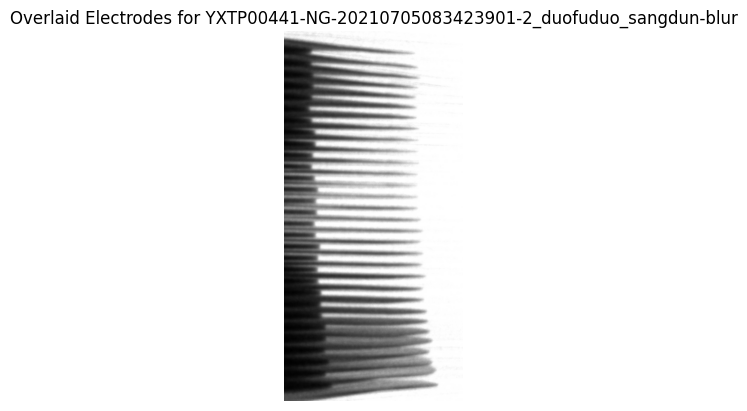

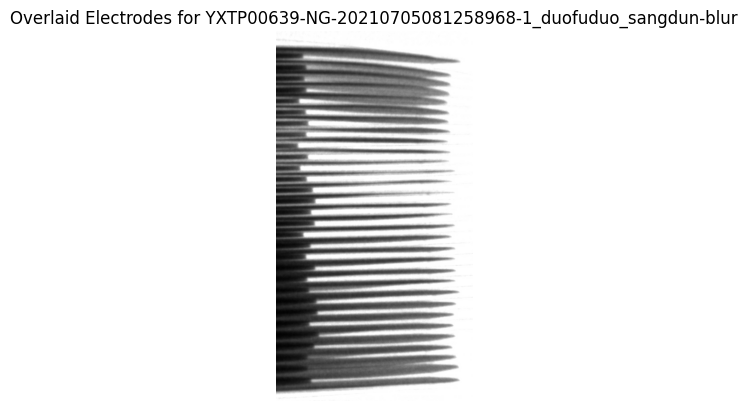

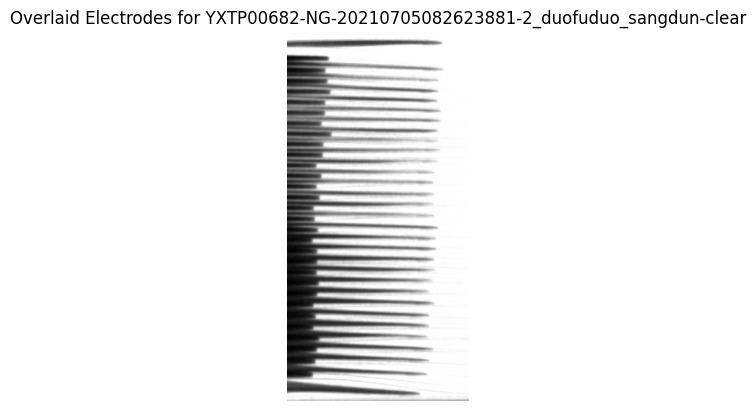

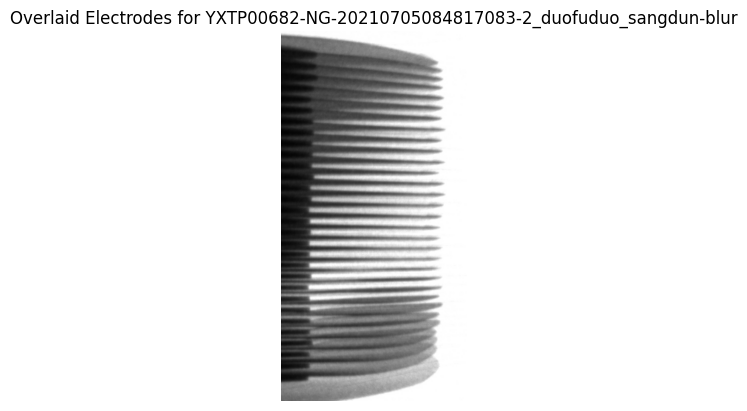

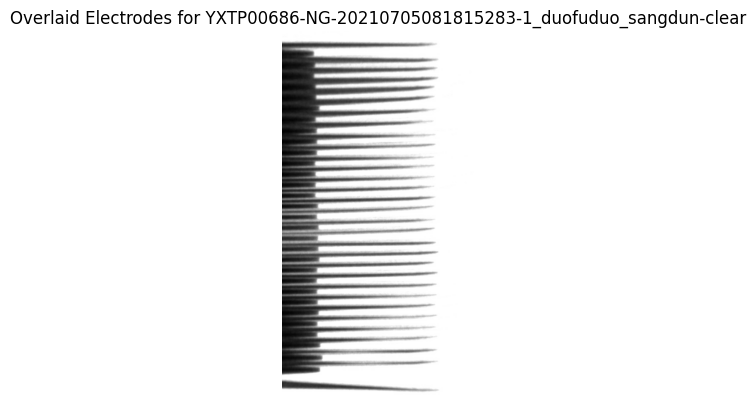

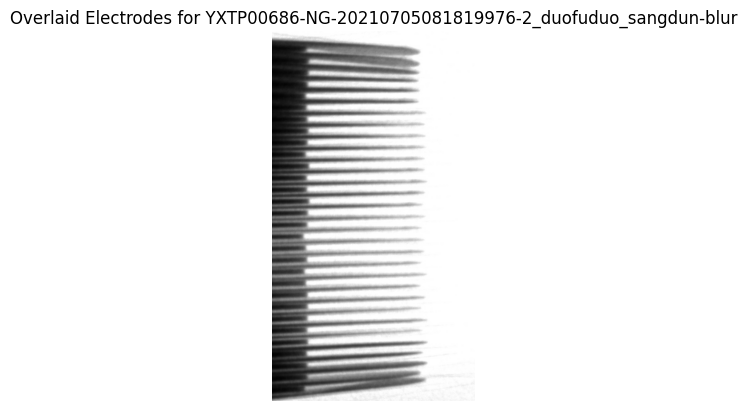

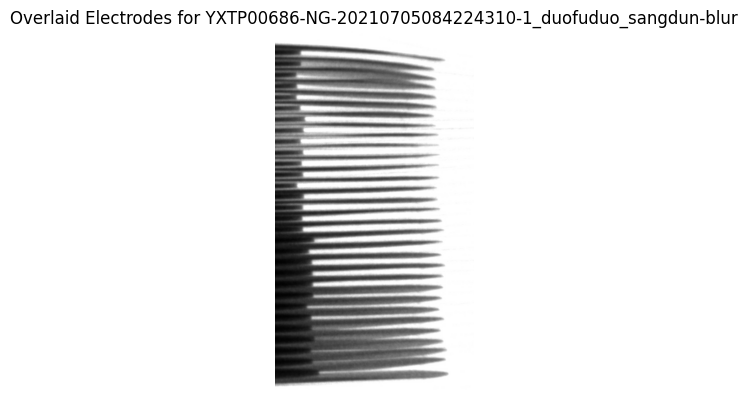

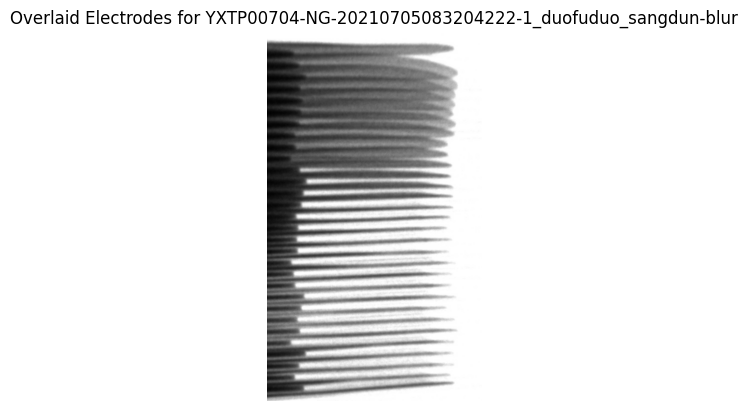

In [17]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

images_dir = "../segmentor/masked_images"
results_dir = "results_run_241217135225"

# 1. Select a random .npy file from results
npy_files = [f for f in os.listdir(results_dir) if f.endswith('.npy')]
if not npy_files:
    raise ValueError("No .npy files found in the results folder.")

for selected_npy in npy_files:
    base_name = os.path.splitext(selected_npy)[0]
    
    # 2. Find the corresponding image in images_dir (any extension)
    possible_image_extensions = ['.bmp', '.jpg', '.png', '.tif']
    image_path = None
    for ext in possible_image_extensions:
        candidate_img = os.path.join(images_dir, base_name + ext)
        if os.path.exists(candidate_img):
            image_path = candidate_img
            break
    
    if image_path is None:
        raise FileNotFoundError(f"No corresponding image found for {base_name} with tried extensions: {possible_image_extensions}")
    
    # 5. Load the original full-size image
    full_img = Image.open(image_path).convert('L')
    full_img_array = np.array(full_img)
    
    # 6. Load the stacked electrode masks
    stacked_masks = np.load(os.path.join(results_dir, selected_npy))  # shape: (N, H, W)
    
    # # Check dimensions match
    if stacked_masks.shape[1:] != full_img_array.shape:
        raise ValueError("Cropped image and electrode masks dimensions do not match.")
    
    # 7. Overlay the electrode positions on the cropped image
    fig, ax = plt.subplots()
    ax.imshow(full_img, cmap='gray')
    
    colors = plt.cm.Spectral(np.linspace(0, 1, stacked_masks.shape[0]))
    
    for i in range(stacked_masks.shape[0]):
        mask = stacked_masks[i]
        Y, X = np.where(mask == 1)
        ax.plot(X, Y, 'o', markerfacecolor=colors[i], markeredgecolor='none', markersize=1, alpha=0.2)
    
    ax.axis('off')
    ax.set_title(f"Overlaid Electrodes for {base_name}")
    plt.show()

In [15]:
stacked_masks

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
unique_values, counts = np.unique(stacked_masks[1], return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0.0: 381981


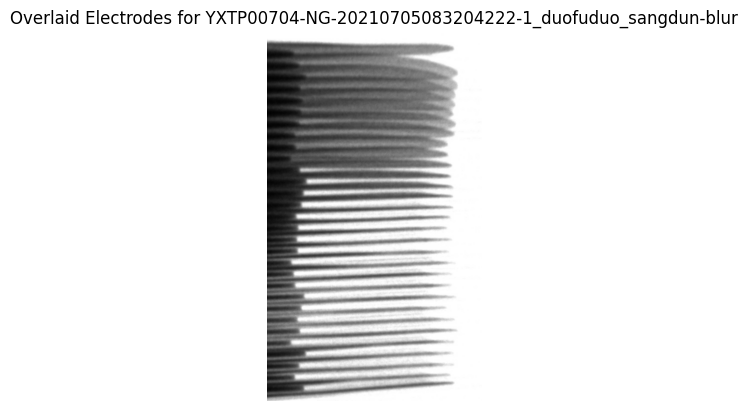

In [13]:
fig, ax = plt.subplots()
ax.imshow(full_img, cmap='gray')

colors = plt.cm.Spectral(np.linspace(0, 1, stacked_masks.shape[0]))

for i in range(stacked_masks.shape[0]):
    mask = stacked_masks[i]
    Y, X = np.where(mask == 1)
    ax.plot(X, Y, 'o', markerfacecolor=colors[i], markeredgecolor='none', markersize=1, alpha=0.2)

ax.axis('off')
ax.set_title(f"Overlaid Electrodes for {base_name}")
plt.show()